In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [5]:
# # Flip Flop
problem_ffp_small = mh.FlipFlopGenerator().generate(seed=0, size=14)
#state = problem_ffp.get_state()

In [6]:
# GABF runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABFRunner(problem=problem_ffp_small,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5, 10],
              mutation_rates=[0.4, 0.5]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [7]:
df_run_curves_ffp.shape

(117, 7)

In [8]:
df_run_curves_ffp['Fitness'].max()

13.0

In [9]:
# need to check Time and FEvals

In [10]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [11]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [12]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
49,49,0.072079,13.0,55.0,5,0.4,2048
73,23,0.044232,13.0,29.0,5,0.5,2048
93,19,0.041812,13.0,22.0,10,0.4,2048
116,22,0.042935,13.0,25.0,10,0.5,2048


In [13]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,5,0.4,55.0,49.0,0.072079
1,5,0.5,29.0,23.0,0.044232
2,10,0.4,22.0,19.0,0.041812
3,10,0.5,25.0,22.0,0.042935


In [16]:
# pick pop size = 10 and mutation_rate = 0.4, as they are the only choice

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001034,5.0,0.0,5,0.4,2048
1,1,0.008093,8.0,2.0,5,0.4,2048
2,2,0.015831,8.0,3.0,5,0.4,2048
3,3,0.020984,9.0,5.0,5,0.4,2048
4,4,0.021407,9.0,6.0,5,0.4,2048


In [18]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [19]:
# GABF runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABFRunner(problem=problem_ffp_small,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[10],
              mutation_rates=[0.4])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [20]:
df_iter_curves_ffp.shape

(247, 7)

In [21]:
df_iter_curves_ffp.to_csv('df_iter_curves_ffp_gabf_14.csv')

In [22]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000491,5.0,0.0,10,0.4,2048
1,1,0.014854,11.0,2.0,10,0.4,2048
2,2,0.024856,11.0,3.0,10,0.4,2048
3,3,0.029735,11.0,4.0,10,0.4,2048
4,4,0.031181,11.0,5.0,10,0.4,2048


In [23]:
df_iter_curves_ffp.Iteration.max()

51

In [24]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [25]:
df_fitness_iter_ffp.shape

(52, 3)

In [26]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,7.300000,3.788889
1,1,9.700000,0.900000
2,2,10.100000,1.433333
3,3,10.500000,1.833333
4,4,10.222222,1.194444


In [27]:
df_iter_curves_ffp.Fitness.max()

13.0

In [42]:
# semi - converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

16

In [43]:
# Convergence
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

51

In [44]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [45]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,7.300000,3.788889,1.946507
1,1,9.700000,0.900000,0.948683
2,2,10.100000,1.433333,1.197219
3,3,10.500000,1.833333,1.354006
4,4,10.222222,1.194444,1.092906


Text(0, 0.5, 'Fitness')

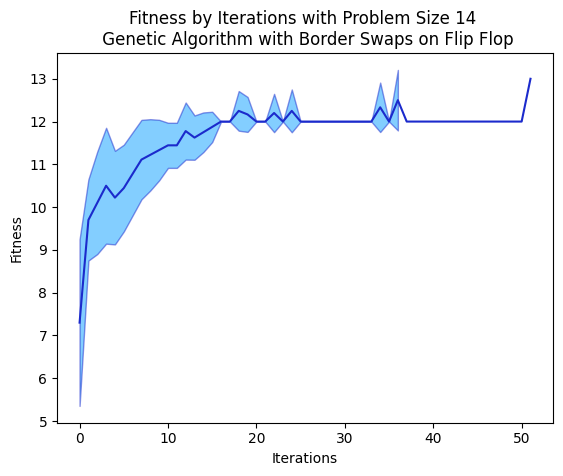

In [46]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 14 \n Genetic Algorithm with Border Swaps on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [47]:
# Fevals - iteration

In [47]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [48]:
df_FEvals_iter_ffp.shape

(52, 3)

In [49]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.000000,0.000000
1,1,1.700000,0.233333
2,2,3.000000,0.444444
3,3,4.300000,0.677778
4,4,5.111111,0.361111


In [50]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [51]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.1213203435596424)

In [52]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == df_FEvals_iter_ffp['stddev_FEvals'].max()].Iteration

36    36
Name: Iteration, dtype: int64

In [53]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.000000,0.000000,0.000000
1,1,1.700000,0.233333,0.483046
2,2,3.000000,0.444444,0.666667
3,3,4.300000,0.677778,0.823273
4,4,5.111111,0.361111,0.600925


Text(0, 0.5, 'FEvals')

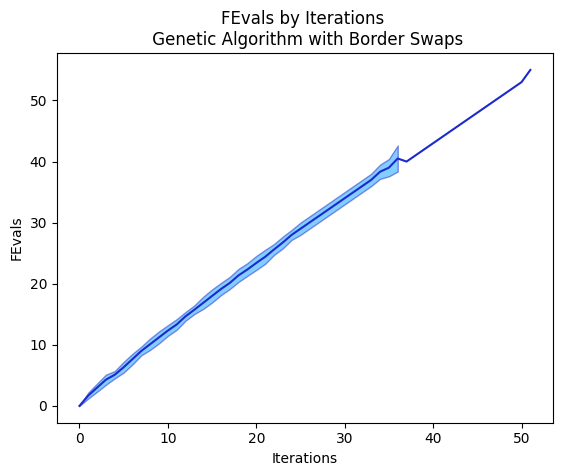

In [54]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [55]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0    0
Name: Iteration, dtype: int64

In [56]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == df_FEvals_iter_ffp.stddev_FEvals.max()]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
36,36,40.5,4.5,2.12132


In [57]:
# fitness - wall clock time

In [58]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [59]:
df_time_iter_ffp.shape

(52, 3)

In [60]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000664,3.515262e-07
1,1,0.008517,2.918188e-05
2,2,0.016108,5.495694e-05
3,3,0.021232,6.651645e-05
4,4,0.022771,8.049082e-05


In [61]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [62]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000664,3.515262e-07,0.000593
1,1,0.008517,2.918188e-05,0.005402
2,2,0.016108,5.495694e-05,0.007413
3,3,0.021232,6.651645e-05,0.008156
4,4,0.022771,8.049082e-05,0.008972


In [64]:
df_time_iter_ffp.stddev_time.max()

0.025635689112729874

Text(0, 0.5, 'Time')

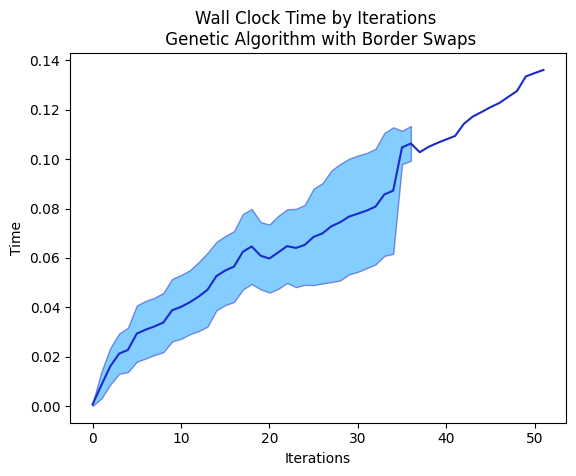

In [65]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [66]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

34    34
Name: Iteration, dtype: int64